In [2]:
from random import randrange
from random import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from math import exp

In [4]:
from random import seed

In [5]:
import tkinter as tk
from tkinter import filedialog

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
def buildNetwork(inputParameters):
    network=[]
    for i in range(1,len(inputParameters)):
        layer = [{'weights':[random() for j in range(inputParameters[i-1])]} for k in range(inputParameters[i])]
        network.append(layer)
    return network

In [8]:
def weightedSum(weights,inputs):
    v=0.0
    for i in range(len(weights)):
        v+=weights[i]*inputs[i]
    return v

In [9]:
def activationFunction(val):
    return 1.0/(1.0+exp(-val))

In [10]:
def activationDerivative(val):
    return val*(1-val)

In [11]:
def accuracy(desired,y):
    count=0
    for i in range(len(desired)):
        if(desired[i]==y[i]):
            count+=1
    return (count/float(len(desired))*100)

In [12]:
def forwardPropagate(network,row):
    inputs=row
    for i in range(len(network)):
        previousLayerOutput=[]
        for n in network[i]:
            #print("length wts:",len(n['weights'])," inputs :",len(inputs))
            wtdSum=weightedSum(n['weights'],inputs)
            n['output']=activationFunction(wtdSum)
            previousLayerOutput.append(n['output'])
        inputs=previousLayerOutput
    return inputs

In [13]:
def ErrorBackPropagation(network,desired):
    numOfLayer=len(network)
    for i in range(len(network[-1])):
        network[-1][i]['delta']=(desired[i]-network[-1][i]['output'])*activationDerivative(network[-1][i]['output'])
    for i in range(numOfLayer-2,-1,-1):
        for j in range(len(network[i])):
            err=0.0
            for k in range(len(network[i+1])):
                err+=network[i+1][k]['weights'][j]*network[i+1][k]['delta']
            network[i][j]['delta']=err*activationDerivative(network[i][j]['output'])
        

In [14]:
def weightUpdate(network,inputs,learningRate):
    for i in range(len(network)):
        inp=inputs[:-1]
        if(i!=0):
            inp=[neuron['output'] for neuron in network[i-1]]
        for neuron in network[i]:
            for j in range(len(inp)):
                neuron['weights'][j]+=learningRate*neuron['delta']*inp[j]

In [15]:
def train(network,train,learningRate,epoch,sizeOfOutput):
    for i in range(epoch):
        errorSum=0
        for row in train:
            output=forwardPropagate(network,row)
            desired=[0]*sizeOfOutput
            desired[int(row[-1])]=1
            for j in range(sizeOfOutput):
                errorSum+=abs(desired[j]-output[j])
            ErrorBackPropagation(network,desired)
            weightUpdate(network,row,learningRate)
        #print("epoch=",i," || error=",errorSum)

In [16]:
def predict(network,inputs):
    out=forwardPropagate(network,inputs)
    return out.index(max(out))

In [17]:
def SplitData(data,num):
    datasetSplit=[]
    datasetCopy=list(data)
    splitSize=int(len(data)/num)
    for i in range(num):
        split=[]
        while(len(split)<splitSize):
            index=randrange(len(datasetCopy))
            split.append(datasetCopy.pop(index))
        datasetSplit.append(split)
    return datasetSplit

In [18]:
def test(network,testData,numberOfSplits,numOfOutput):
    Splits=SplitData(testData,numberOfSplits)
    score=[]
    output=[]
    desired=[]
    grapgData=[]
    for split in Splits:
        for row in split:
            out=predict(network,row)
            output.append(out)
            target=row[-1]
            desired.append(target)
            a=accuracy(desired,output)
            grapgData.append(a)
        acc=accuracy(desired,output)
        score.append(acc)
    result=[score,grapgData]
    return result

In [19]:
def main(normalize):
    epoch=int(input("Enter the numbet of epoch: "))
    LR=float(input("Enter the Learning rate: "))
    root=tk.Tk()
    root.withdraw()
    filePath=filedialog.askopenfilename()
    data=pd.read_csv(filePath)
    data.dropna(inplace=True)
    X=data.drop('class',axis=1).values
    X=StandardScaler().fit_transform(X)
    col=data.columns
    if(normalize):
        normalizedData=pd.DataFrame(X,columns=col[:-1])
        normalizedData['class']=data['class']
        print(normalizedData.head(10))
    else:
        normalizedData=pd.DataFrame(data.drop('class',axis=1),columns=col[:-1])
        normalizedData['class']=data['class']
        print(normalizedData.head(10))
    Xtrain,Xtest,Ytrain,Ytest=train_test_split(data.drop('class',axis=1).values,normalizedData['class'].values,test_size=0.3)
    TrainDf=pd.DataFrame(Xtrain,columns=col[:-1])
    TrainDf['class']=Ytrain
    TestDf=pd.DataFrame(Xtest,columns=col[:-1])
    TestDf['class']=Ytest
    numOfLayer=int(input("Enter the number of layers : "))
    networkParameter=[]
    for i in range(numOfLayer):
        a=int(input("Enter the number of neurons in layer :"))
        networkParameter.append(a)
    #print(networkParameter[-1])
    network=buildNetwork(networkParameter)
    print("Starting training")
    train(network,TrainDf.values,LR,epoch,networkParameter[-1])
    numSplits=int(input("Enter the number of validation splits: "))
    score=test(network,TestDf.values,numSplits,networkParameter[-1])
    return score

In [23]:
score=main(False)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.plot(score[1])
print(score[0])

Enter the numbet of epoch: 100
Enter the Learning rate: 0.001
        attr1      attr2     attr3     attr4     attr5      attr6      attr7  \
0  140.562500  55.683782 -0.234571 -0.699648  3.199833  19.110426   7.975532   
1  102.507812  58.882430  0.465318 -0.515088  1.677258  14.860146  10.576487   
2  103.015625  39.341649  0.323328  1.051164  3.121237  21.744669   7.735822   
3  136.750000  57.178449 -0.068415 -0.636238  3.642977  20.959280   6.896499   
4   88.726562  40.672225  0.600866  1.123492  1.178930  11.468720  14.269573   
5   93.570312  46.698114  0.531905  0.416721  1.636288  14.545074  10.621748   
6  119.484375  48.765059  0.031460 -0.112168  0.999164   9.279612  19.206230   
7  130.382812  39.844056 -0.158323  0.389540  1.220736  14.378941  13.539456   
8  107.250000  52.627078  0.452688  0.170347  2.331940  14.486853   9.001004   
9  107.257812  39.496488  0.465882  1.162877  4.079431  24.980418   7.397080   

        attr8  class  
0   74.242225      0  
1  127.3935

[91.75046554934822]


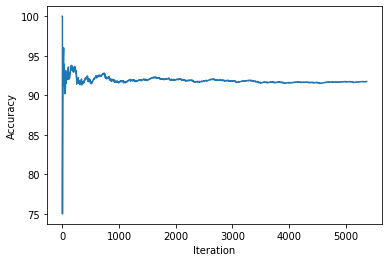

Enter the numbet of epoch: 100
Enter the Learning rate: 0.001
      attr1     attr2     attr3     attr4     attr5     attr6     attr7  \
0  1.149317  1.334832 -0.669570 -0.400459 -0.319440 -0.370625 -0.072798   
1 -0.334168  1.802265 -0.011785 -0.370535 -0.371102 -0.588924  0.504427   
2 -0.314372 -1.053322 -0.145233 -0.116593 -0.322107 -0.235328 -0.125996   
3  1.000694  1.553254 -0.513409 -0.390178 -0.304404 -0.275666 -0.312265   
4 -0.871402 -0.858879  0.115609 -0.104866 -0.388010 -0.763111  1.324026   
5 -0.682579  0.021713  0.050796 -0.219458 -0.372492 -0.605106  0.514472   
6  0.327629  0.323766 -0.419542 -0.305208 -0.394110 -0.875546  2.419609   
7  0.752482 -0.979903 -0.597908 -0.223865 -0.386592 -0.613639  1.161993   
8 -0.149304  0.888141 -0.023655 -0.259403 -0.348888 -0.608097  0.154783   
9 -0.148999 -1.030695 -0.011255 -0.098480 -0.289595 -0.069137 -0.201172   

      attr8  class  
0 -0.287438      0  
1  0.211581      0  
2 -0.391373      0  
3 -0.481300      0  
4  1.38

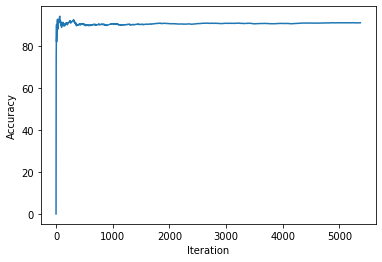

In [25]:
score=main(True)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.plot(score[1])
print("Accuracy",score[0])

Enter the numbet of epoch: 100
Enter the Learning rate: 0.001
        pCom1      pCom2      pCom3     pCom4  class
0  -27.191086 -29.677875  19.480712  3.042950      0
1   24.476215  -6.024175 -11.394628  5.335957      0
2  -39.938920 -10.828048 -14.768748  2.101549      0
3  -48.000825 -29.833257  16.330411  2.836173      0
4  147.919433  18.562548 -22.296929  1.584217      0
5   28.073053  -0.474673 -20.924256  5.225414      0
6  373.725043  35.293498  13.025063 -9.068986      0
7   95.622950  -8.922042  11.008201 -0.042814      0
8    5.391950 -10.443855  -9.030527  6.385434      0
9  -45.559469 -11.739464 -10.329842 -0.283569      0
Enter the number of layers : 10
Enter the number of neurons in layer :4
Enter the number of neurons in layer :5
Enter the number of neurons in layer :7
Enter the number of neurons in layer :9
Enter the number of neurons in layer :10
Enter the number of neurons in layer :7
Enter the number of neurons in layer :5
Enter the number of neurons in layer :5
En

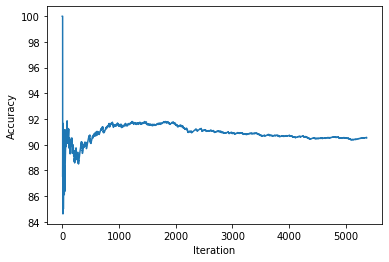

In [26]:
#PCA
score=main(False)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.plot(score[1])
print("Accuracy",score[0])

Enter the numbet of epoch: 100
Enter the Learning rate: 0.001
   component1  component2  component3  component4  class
0   -0.000914    0.008758   -0.000794    0.004168      0
1    0.006099   -0.000079    0.000239    0.000309      0
2    0.003524   -0.001694    0.002476    0.004205      0
3   -0.000931    0.007725   -0.000350    0.005530      0
4    0.007421   -0.004643    0.001584   -0.009829      0
5    0.007571   -0.002883    0.001096   -0.000123      0
6   -0.001096    0.002291    0.000925   -0.028340      0
7    0.000536    0.005403    0.000352   -0.005557      0
8    0.006085    0.000942   -0.000227    0.001997      0
9    0.001198   -0.001123    0.003024    0.004050      0
Enter the number of layers : 10
Enter the number of neurons in layer :4
Enter the number of neurons in layer :5
Enter the number of neurons in layer :7
Enter the number of neurons in layer :9
Enter the number of neurons in layer :10
Enter the number of neurons in layer :7
Enter the number of neurons in layer :

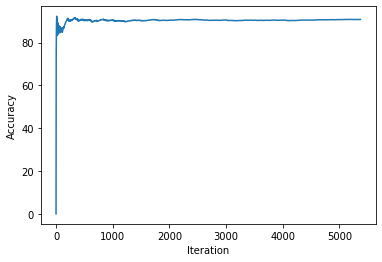

In [27]:
#ica
score=main(False)
plt.ylabel('Accuracy')
plt.xlabel('Iteration')
plt.plot(score[1])
print("Accuracy",score[0])